In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [3]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["kinopoisk_R"] # отбираем столбец с откликами

In [4]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [5]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
cat_boost = CatBoostRegressor()
cat_boost.fit(X_train, y_train)

Learning rate set to 0.041926
0:	learn: 1.3101384	total: 157ms	remaining: 2m 37s
1:	learn: 1.2824126	total: 160ms	remaining: 1m 19s
2:	learn: 1.2594122	total: 163ms	remaining: 54.1s
3:	learn: 1.2358233	total: 166ms	remaining: 41.4s
4:	learn: 1.2122181	total: 169ms	remaining: 33.6s
5:	learn: 1.1889777	total: 176ms	remaining: 29.2s
6:	learn: 1.1666712	total: 180ms	remaining: 25.5s
7:	learn: 1.1474304	total: 184ms	remaining: 22.8s
8:	learn: 1.1278823	total: 187ms	remaining: 20.6s
9:	learn: 1.1072581	total: 191ms	remaining: 18.9s
10:	learn: 1.0888104	total: 194ms	remaining: 17.4s
11:	learn: 1.0722199	total: 197ms	remaining: 16.2s
12:	learn: 1.0577798	total: 200ms	remaining: 15.2s
13:	learn: 1.0419514	total: 203ms	remaining: 14.3s
14:	learn: 1.0286484	total: 206ms	remaining: 13.5s
15:	learn: 1.0112440	total: 209ms	remaining: 12.8s
16:	learn: 0.9951195	total: 212ms	remaining: 12.3s
17:	learn: 0.9833212	total: 215ms	remaining: 11.7s
18:	learn: 0.9705076	total: 218ms	remaining: 11.3s
19:	learn

In [7]:
# Предсказание на тестовой выборке
y_pred = cat_boost.predict(X_test)

# Расчет метрик
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Вывод метрик
print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.7790880043434112
Mean Squared Error: 0.3346160262681583
Mean Absolute Error: 0.3931807696807258


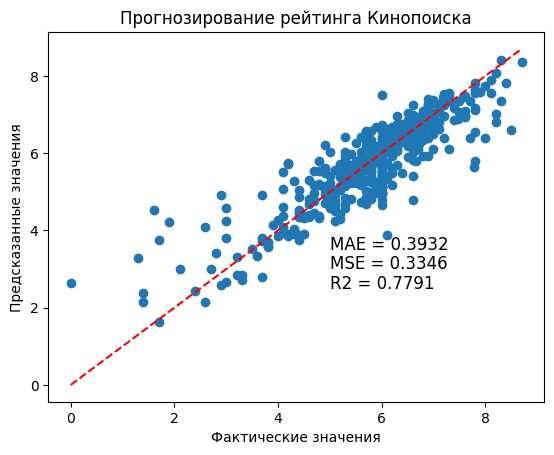

In [8]:
# Вывод графика
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.text(5, 2.5, 'R2 = {:.4f}'.format(r2), fontsize=12)
plt.text(5, 3.0, 'MSE = {:.4f}'.format(mse), fontsize=12)
plt.text(5, 3.5, 'MAE = {:.4f}'.format(mae), fontsize=12)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Прогнозирование рейтинга Кинопоиска")
plt.show()

In [9]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["box"] # отбираем столбец с откликами

In [10]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [11]:
cat_boost = CatBoostRegressor()
cat_boost.fit(X_train, y_train)

Learning rate set to 0.041926
0:	learn: 312213903.4640135	total: 3.69ms	remaining: 3.69s
1:	learn: 306504182.9608150	total: 6.74ms	remaining: 3.36s
2:	learn: 301343831.6788393	total: 9.48ms	remaining: 3.15s
3:	learn: 295974181.3186693	total: 12.3ms	remaining: 3.07s
4:	learn: 291430677.9970852	total: 15.9ms	remaining: 3.17s
5:	learn: 286419908.6170294	total: 19ms	remaining: 3.15s
6:	learn: 281682165.6721524	total: 21.8ms	remaining: 3.1s
7:	learn: 277275022.8477649	total: 24.6ms	remaining: 3.05s
8:	learn: 273396783.1820727	total: 27.4ms	remaining: 3.01s
9:	learn: 269465680.6922111	total: 30.5ms	remaining: 3.02s
10:	learn: 264949894.2847553	total: 33.2ms	remaining: 2.98s
11:	learn: 261494580.5126181	total: 36ms	remaining: 2.96s
12:	learn: 258141025.8609538	total: 38.8ms	remaining: 2.95s
13:	learn: 254088647.9012226	total: 41.5ms	remaining: 2.92s
14:	learn: 250559229.5064134	total: 44.4ms	remaining: 2.92s
15:	learn: 247710434.9268114	total: 47.1ms	remaining: 2.9s
16:	learn: 244594015.99702

In [12]:
# Предсказание на тестовой выборке
y_pred = cat_boost.predict(X_test)

# Расчет метрик
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Вывод метрик
print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.6961300448654311
Mean Squared Error: 1.4121814796466494e+16
Mean Absolute Error: 40337513.05613101


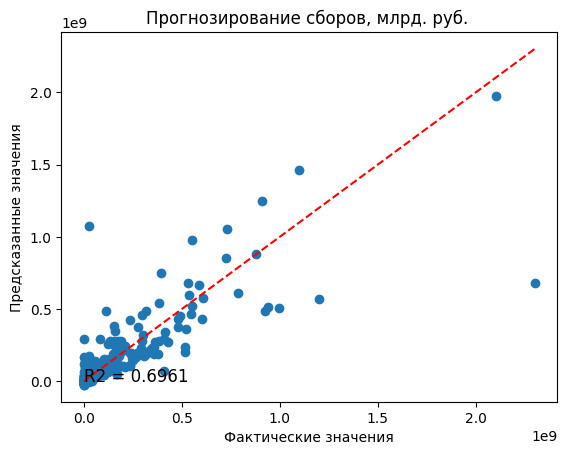

In [14]:
# Вывод графика
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.text(1, 2.5, 'R2 = {:.4f}'.format(r2), fontsize=12)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Прогнозирование сборов, млрд. руб. ")
plt.show()

In [15]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["views"] # отбираем столбец с откликами

In [16]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [17]:
cat_boost = CatBoostRegressor()
cat_boost.fit(X_train, y_train)

Learning rate set to 0.041926
0:	learn: 1251134.9946282	total: 3.53ms	remaining: 3.52s
1:	learn: 1226027.1284963	total: 6.57ms	remaining: 3.28s
2:	learn: 1204679.3564050	total: 9.46ms	remaining: 3.14s
3:	learn: 1180371.3411507	total: 12.8ms	remaining: 3.19s
4:	learn: 1158643.2357187	total: 15.6ms	remaining: 3.11s
5:	learn: 1134896.9360789	total: 18.4ms	remaining: 3.04s
6:	learn: 1114326.4637346	total: 21.1ms	remaining: 3s
7:	learn: 1094174.5130190	total: 24.3ms	remaining: 3.01s
8:	learn: 1079618.7237173	total: 27.8ms	remaining: 3.06s
9:	learn: 1060689.3540583	total: 30.6ms	remaining: 3.03s
10:	learn: 1038469.6667182	total: 33.3ms	remaining: 3s
11:	learn: 1023870.0001475	total: 36.1ms	remaining: 2.97s
12:	learn: 1008173.3760164	total: 39.1ms	remaining: 2.97s
13:	learn: 992719.1414001	total: 42.1ms	remaining: 2.97s
14:	learn: 979300.8178437	total: 45.1ms	remaining: 2.96s
15:	learn: 966615.0735176	total: 48ms	remaining: 2.95s
16:	learn: 951502.8538372	total: 50.7ms	remaining: 2.93s
17:	le

In [18]:
# Предсказание на тестовой выборке
y_pred = cat_boost.predict(X_test)

# Расчет метрик
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Вывод метрик
print("R2 score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R2 score: 0.7143188616452341
Mean Squared Error: 224631961039.53024
Mean Absolute Error: 180635.22466829635


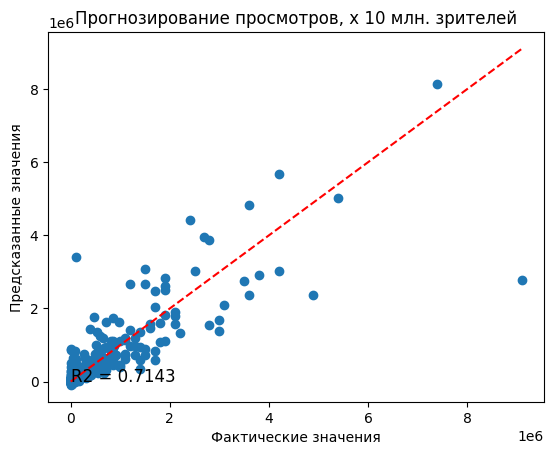

In [20]:
# Вывод графика
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.text(1, 4.5, 'R2 = {:.4f}'.format(r2), fontsize=12)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Прогнозирование просмотров, х 10 млн. зрителей")
plt.show()